# 우리 기업의 판매 상태는 어떨까?

## 상황 인식과 문제 정의

### 1) 상황 인식
---
우리들은 "모두게임"이라는 게임회사에 근무하고 있는 데이터분석가이다. <br>
모두게임은 모바일 게임을 개발하고 운영하고 있으며 시장에서의 반응이 나쁘지 않다. <br>
이번에 새로 런칭한 게임은 Mine Ground와 Soccer Manager라는 두 개 게임이다. <br>
각 게임은 인앱 결제를 통해 게임 내 아이템을 판매하고 있다. <br>
이제부터 우리를 "모두게임"의 수익 극대화를 위해 게임에서 측정되는 각종 데이터를 수집하고 모니터링 해야 한다.

### 2) 문제 정의
---
> 핵심 문제: 우리 기업의 판매 상태는 어떤가? 그리고 이 문제를 해결하기 위해 무엇을 해야 하는가? <br>

회사에서 수집되는 데이터는 크게 두 종류이다.
1. 게임 상 수집되는 Sales Data
2. 런처에서 수집되는 Customer Data

각 데이터들은 일간 단위로 수집되고 있다. <br>
이 데이터들을 통해 데이터들을 이리저리 살펴보고 우리 회사의 판매 상태에 대해 객관적으로 알아보자.

## 데이터 분석

### 1) 데이터 분석
---

In [1]:
# Pandas와 Matplotlib를 호출
import pandas as pd
import matplotlib.pyplot as plt

# Sales Data를 변수명 SalesLog에 할당
SalesLog = pd.read_csv('./data/Sales.csv')
SalesLog.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [2]:
# SalesLog 정보 확인
SalesLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       99845 non-null  object
 4   Payment      99845 non-null  int64 
 5   Customer_ID  99845 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


Sales 데이터를 살펴보니 총 여섯 개 컬럼이 발견되었다. <br>
<br>
고객들이 게임을 설치한 일자(install) <br>
최종 로그기록(Time_stamp) <br>
게임명(Game_Name) <br>
상태(Status) <br>
결제금액(Payment) <br>
유저 아이디(Customer_ID) <br>
이 중에서 가장 관심이 가는 건 아무래도 결제금액이다

In [3]:
# 결제된 금액 총액 계산하기
SalesLog['Payment'].sum()

144443100

2022년 1월부터 3월까지 144,443,100원을 벌었다.<br> 
새로 런칭한 게임이니만큼 앞으로가 기대된다.

#### 결제 금액을 조금 더 살펴보도록 하자.
각 데이터들은 적절히 전처리 되고 시각화할 수 있다. <br>
시각화를 통해 어떤 정보를 얻을 수 있을까?

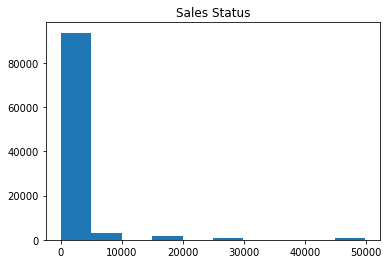

In [4]:
# 결제 금액을 히스토그램으로 그리기
plt.hist(SalesLog['Payment'])
plt.title('Sales Status')
plt.show()

결제금액을 히스토그램으로 그려보니 대부분이 10,000원 이하로 결제를 하고 있는 것을 알 수 있다.<br>
아마도 고객들이 결제할 때 소액을 결제하는 경우가 많은 것 같다.

#### 무과금을 빼고 다시 한번 히스토그램을 그려보자.
먼저 결제금액이 0원이 아닌 경우만 골라서 변수 Sales에 할당한 후 히스토그램을 그려보자.

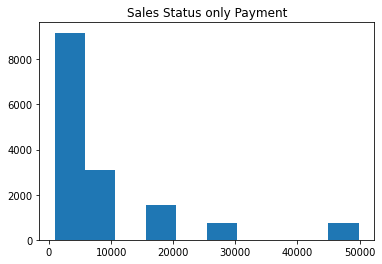

In [5]:
# 결제금액이 0원이 아닌 경우만 골라내서 Sales 변수에 할당
Sales = SalesLog[SalesLog['Payment']!=0]

# 결제 금액을 히스토그램으로 그리기
plt.hist(Sales['Payment'])
plt.title('Sales Status only Payment')
plt.show()

무과금을 빼고 히스토그램을 그려봐도 결제 패턴은 크게 달라지지 않았다. <br>
아무래도 대다수 고객들은 10,000원 이하 금액으로 많이 결제하고 있는것 같다.

#### 이번에는 boxplot을 통해 결제 금액의 사분위수를 확인해보자
`describe()` 함수를 사용하면 데이터의 기술 통계량을 쉽게 확인할 수 있다.

In [6]:
# 결제금액의 기술통계량 확인하기
Sales['Payment'].describe()

count    15309.000000
mean      9435.175387
std      11897.228643
min        900.000000
25%        900.000000
50%       4900.000000
75%       9900.000000
max      49900.000000
Name: Payment, dtype: float64

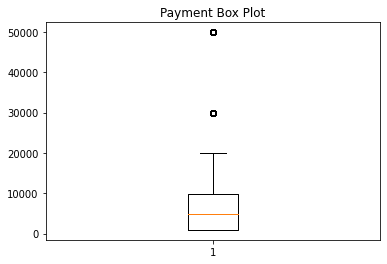

In [7]:
plt.boxplot(Sales['Payment'])
plt.title('Payment Box Plot')
plt.show()

결제금액의 최솟값은 900원, IQ1(25%)값도 900원, IQ2(중위 값)값은 4,900원이다. <br>
평균 결제금액은 9,435원으로 분석되었다. (위의 기술통계량 결과를 통해 구체적인 값을 확인할 수 있다.)

#### 최솟값과 최대값이 각각 900원과 49,990원인것을 고려하면 상대적으로 적은 금액을 결제하는 고객이 정말 많은 것 같다.

In [8]:
Sales['Payment'].value_counts()/len(Sales['Payment'])

900      0.350709
4900     0.248677
9900     0.201581
19900    0.100856
29900    0.050036
49900    0.048142
Name: Payment, dtype: float64

실제로 900원 결제 건수는 전체의 약 35%, <br>
4,900원 결제 건수는 전체의 약 24%로 <br>
두 금액 결제 건수의 합이 전체의 약 70% 수준이나 된다.

이번에는 월별 결제금액을 한번 확인해보자.

#### 1월에 처음 런칭했으니 3월까지 쭉 상승했으면 좋겠다.
> 여기서 잠깐🤚 <br>
> 월별로 결제금액을 집계하기 위해서는 `groupby()`라는 함수가 사용된다. `groupby()`는 pandas의 데이터프레임 중 특정 열을 기준으로 집계할 수 있다. 아래 코드는 순서대로 한번 읽어보면 다음과 같다. 'SalesLog의 Payment의 값을 SalesLog의 Month를 기준으로 집계한 값을 보여줘' 라는 의미이다.

In [9]:
# SalesLog에 Month열을 만들고, 월별 날짜값을 입력
SalesLog['Month'] = SalesLog['Time_stamp'].str[:7]

# 월별 결제금액 확인하기
SalesLog['Payment'].groupby(SalesLog['Month']).sum()

Month
2022-02    80841800
2022-03    63601300
Name: Payment, dtype: int64

월별로 결제금액을 나눠보니 뭔가 이상하다. <br>
1월에는 결제금액이 아예 없고, 2월에 비해 3월 결제금액이 줄었다.

#### 2월과 3월 결제금액을 구체적으로 살펴보겠습니다
막대 그래프를 통해 시각적으로 확인해보자

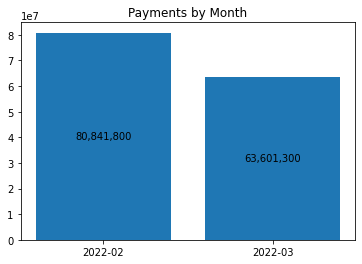

In [10]:
temp_data = SalesLog['Payment'].groupby(SalesLog['Month']).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f'{x:,.0f}' for x in ax.datavalues], label_type='center')
plt.title('Payments by Month')
plt.show()

Sales02변수를 만들고, 2월에 결제한 데이터 할당해보자. 무과금은 제외한다는 것을 잊지 말자!

In [11]:
# Sales02변수를 만들고, 2월에 결제한 데이터 할당하기
Sales02 = SalesLog[(SalesLog['Month'] == '2022-02')& (SalesLog['Payment'] != 0)]

시각화를 하기 위해 인덱스를 정렬해보자

In [12]:
# 시각화를 위한 인덱스 정렬하기
Sales02.reset_index(drop=True)

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Month
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
8537,2022-02-12,2022-02-14,SoccerManager,play,4900,quam946,2022-02
8538,2022-02-10,2022-02-14,SoccerManager,play,4900,commodi507,2022-02
8539,2022-02-16,2022-02-21,SoccerManager,play,900,rerum275,2022-02
8540,2022-02-16,2022-02-20,SoccerManager,play,9900,quo151,2022-02


2월에 결제한 데이터를 날짜 순으로 정렬 후, 막대 그래프를 그려보자

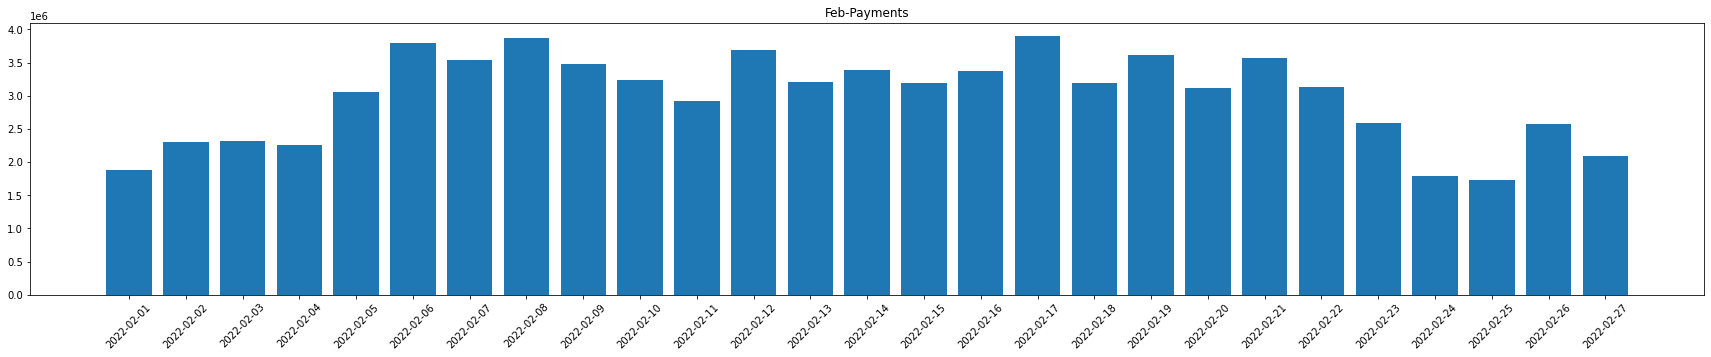

In [13]:
# 2월에 결제한 데이터 시각화하기
temp_data = Sales02['Payment'].groupby(Sales02['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Feb-Payments')
plt.xticks(rotation=45)
plt.show()

이번에는 3월에 결제한 데이터를 시각화해보자

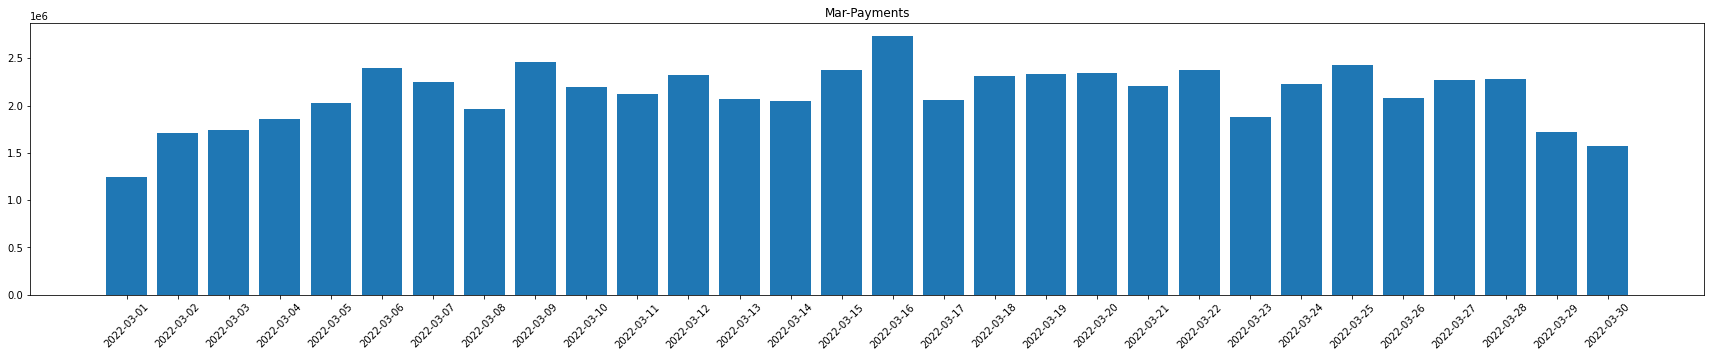

In [14]:
Sales03 = SalesLog[(SalesLog['Month'] == '2022-03')& (SalesLog['Payment'] != 0)]
Sales03.reset_index(drop=True)
temp_data = Sales03['Payment'].groupby(Sales03['Time_stamp']).sum()
plt.figure(figsize=(30,5))
plt.bar(temp_data.index, temp_data)
plt.title('Mar-Payments')
plt.xticks(rotation=45)
plt.show()

2월과 3월에 결제한 금액을 일자별로 시각화해봤지만 뚜렷하게 이상한 점은 없다. <br>
아쉽지만 아무래도 원인을 밝히는 것은 다음 분석으로 넘겨야할 것 같다.

#### 지금까지는 Sales 데이터를 살펴봤으니 Customer 데이터를 살펴보자
우선 customer 데이터를 불러와 정보를 확인해보자

In [15]:
CustomerLog = pd.read_csv('./data/customer.csv')
print(CustomerLog)

CustomerLog.info()

          Customer_ID Name     Nickname  Password  \
0          facilis140  이영순         quos  ********   
1          debitis994  김중수    molestiae  ********   
2         possimus246  양은경          rem  ********   
3        occaecati138  백도윤       libero  ********   
4         corrupti325  김영수   temporibus  ********   
...               ...  ...          ...       ...   
99840        dicta630  김예지          sit  ********   
99841      tempora976  문은경         modi  ********   
99842        iusto840  강중수        iusto  ********   
99843         nemo273  황정남     deleniti  ********   
99844  consequatur371  이영식  accusantium  ********   

                              Email       Birth  Gender              C.P.  \
0                   coejongsu@yu.kr  1989-03-11  female  01x9-4x625-x5x3x   
1                   jiweon02@ju.org  1995-11-19    male  01x9-3x228-x3x9x   
2           coesubin@jusighoesa.com  2005-12-24  female  01x9-7x873-x2x2x   
3            yeongceol80@gangryu.kr  2003-02-09  female

Customer 데이터를 살펴보니 총 열개 컬럼이 발견되었다.

- 유저 아이디(Customer_ID)
- 고객 이름(Name)
- 게임 내 닉네임(Nickname)
- 비밀번호(Password)
- 고객 이메일(Email)
- 고객 생년월일(Birth)
- 고객 성별(Gender)
- 고객 휴대폰번호(C.P.)
- 모바일 서비스 기업(MobileCompany)
- 모바일 OS(OS) <br>

우리 게임을 이용하는 고객은 어떤 분들일까? 누가 우리 게임에서 결제하고 있을까?

#### 시각화를 통해 한 번 살펴보도록 하자
이번에는 파이그래프를 사용하려고 한다. 먼저 고객 성별에 따른 파이 그래프를 그려보자. <br> 
customer 데이터에서 'Gender' 컬럼을 `groupby()`를 사용해 성별로 묶어준 후 파이 그래프를 그린다.

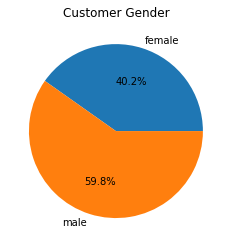

In [16]:
# 고객 성별에 따른 파이그래프 그리기
pie_data = CustomerLog.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

고객 모바일 서비스 기업과 고객 모바일 OS에 따른 파이 그래프를 그려보자

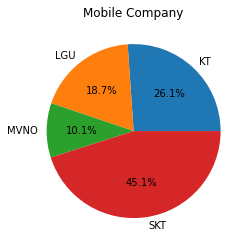

In [17]:
# 고객 모바일 서비스 기업에 따른 파이그래프 그리기
pie_data = CustomerLog.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Mobile Company')
plt.show()

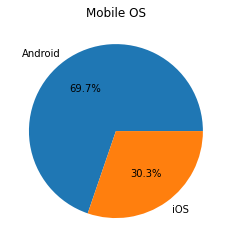

In [18]:
# 고객 모바일 os에 따른 파이그래프 그리기
pie_data = CustomerLog.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Mobile OS')
plt.show()

우리 고객이 어떤 분들인지 대충 윤곽이 보인다! 여성보다는 남성이 많이 이용하고, 안드로이드를 사용하는 고객이 많다

#### 이번에는 결제 경험이 있는 고객들만을 골라서 똑같은 시각화를 수행해보자
##### 데이터 결합
`merge()` 함수를 사용해 Customer 데이터와 Sales 데이터를 결합해보자

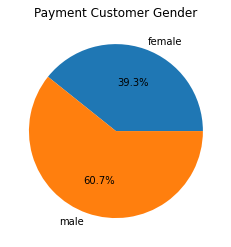

In [19]:
# Customer 데이터와 Sales 데이터를 결합하기
TotalData = pd.merge(CustomerLog, SalesLog)

# 결제 경험이 있는 고객들만 골라내기
PaymentCustomer = TotalData[(TotalData["Payment"] != 0)]

# 결제 경험이 있는 고객 성별에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['Gender']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Gender')
plt.show()

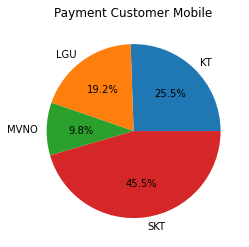

In [20]:
# 결제 경험이 있는 고객 모바일 서비스 기업에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['MobileCompany']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer Mobile')
plt.show()

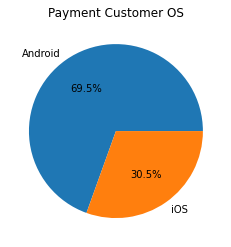

In [21]:
# 결제 경험이 있는 고객 모바일OS에 따른 파이그래프 그리기
pie_data = PaymentCustomer.groupby(['OS']).count().Name
plt.pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('Payment Customer OS')
plt.show()

큰 차이가 보이지 않는다. 아무래도 고객 성별과 통신사, OS는 결제와는 크게 상관없는 것 같다.

#### 고객 성별에 따른 결제 금액을 월별로 한 번 관찰해보자
##### 월별 고객
먼저 월별 고객 성별에 따른 결제 금액을 확인해보자. 결제 금액이 있는 고객만 추려낸 PaymentCustomer 데이터에서 'Gender'와 'Month'를 묶은 후 각 값을 합해보자.

In [22]:
PaymentCustomer["Payment"].groupby([PaymentCustomer["Gender"], PaymentCustomer["Month"]]).sum()

Gender  Month  
female  2022-02    32103200
        2022-03    25295700
male    2022-02    48738600
        2022-03    38305600
Name: Payment, dtype: int64

이번에는 male과 female 변수를 만들고 성별에 따라 데이터를 할당해보자

In [23]:
male = PaymentCustomer[PaymentCustomer["Gender"] == "male"]
female = PaymentCustomer[PaymentCustomer["Gender"] == "female"]

마지막으로 월별 여성과 남성 고객의 결제 금액을 각각의 막대 그래프로 그려보자

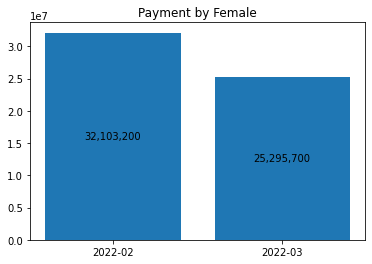

In [24]:
# 여성 고객
temp_data = female["Payment"].groupby(female["Month"]).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f"{x:,.0f}" for x in ax.datavalues], label_type="center")
plt.title("Payment by Female")
plt.show()

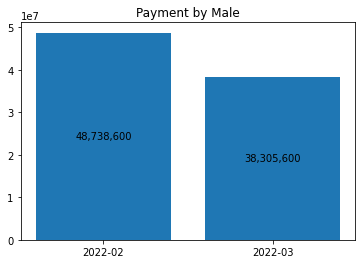

In [25]:
# 남성 고객
temp_data = male["Payment"].groupby(male["Month"]).sum()
ax = plt.bar(temp_data.index, temp_data)
plt.bar_label(ax, labels=[f"{x:,.0f}" for x in ax.datavalues], label_type="center")
plt.title("Payment by Male")
plt.show()

2월과 3월 모두 남성 고객이 더 많은 금액을 결제한 것을 알 수 있다. 하지만 남성과 여성 모두 2월에 비해 3월 결제 금액이 줄었다. <br>
빨리 원인을 찾아야 한다.

### 전략 수립 및 실행
지금까지 분석 결과를 통해 다음과 같은 사실을 확인할 수 있다.
1. 우리 회사의 3월 매출은 2월에 비해 감소했다.
2. 현재 수집된 고객 관련 데이터로는 유의미한 원인이 도출되지 않는다.

이제 이 결과를 바탕으로 매출액이 감소하는 원인을 찾아야 한다. 필요하면 추가적인 데이터 분석을 수행할 필요가 있다.